## Air Carrier FInancial Reports

Project build to analyze the consumption fuel from airplanes, and using statistical analysis to identify how to reduce cost and lower consumption fuel

https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FMH

In [1]:
import pandas as pd
description = pd.read_csv('./DescriptionTable.csv')
description

,Label,Description
0,SDOMGallons,Scheduled Service Domestic Non-Alaskan
1,SATLGallons,Scheduled Service International Atlantic
2,SPACGallons,Scheduled Service International Pacific
3,SLATGallons,Scheduled Service International Latin America
4,NALAGallons,Non Scheduled Service Domestic Intra Alaska
5,NDOMGallons,Non Scheduled Service Domestic Non-Alaskan
6,NATLGallons,Non Scheduled Service International Atlantic
7,NPACGallons,Non Scheduled Service International Pacific
8,NLATGallons,Non Scheduled Service International Latin America
9,MACGallons(Non Scheduled Service International...,Military Airlift Command Operations (Includes ...


In [2]:
# Imports libs
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sbn
import plotly.express as ex
import db_dtypes
import numpy as np

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [3]:
# Google cloud bigquery tool connection
from google.cloud import bigquery
from google.oauth2 import service_account
credentials = service_account.Credentials.from_service_account_file('./Projeto_python_bq/python-api-gads-5adb7d92600d.json')

In [4]:
project_id = 'python-api-gads'
client = bigquery.Client(credentials = credentials, project = project_id)

In [5]:
# Making a query on cloud 
query_job = client.query("""
SELECT * FROM python-api-gads.staging.T_F41SCHEDULE_P12A""")
results = query_job.result()
print("Total de Linhas no dataset: ", results.total_rows)

Total de Linhas no dataset:  22968


In [6]:
# Transformation to dataframe
df = results.to_dataframe()
df = pd.DataFrame(df)

In [7]:
# Checking the data types
df.dtypes

YEAR              object
QUARTER           object
MONTH             object
UNIQUE_CARRIER    object
CARRIER_NAME      object
SALA_GALLONS       Int64
SDOM_GALLONS       Int64
SATL_GALLONS       Int64
SPAC_GALLONS       Int64
SLAT_GALLONS       Int64
NALA_GALLONS       Int64
NDOM_GALLONS       Int64
NATL_GALLONS       Int64
NPAC_GALLONS       Int64
NLAT_GALLONS       Int64
MAC_GALLONS        Int64
SALA_COST          Int64
SDOM_COST          Int64
SATL_COST          Int64
SPAC_COST          Int64
SLAT_COST          Int64
NALA_COST          Int64
NDOM_COST          Int64
NATL_COST          Int64
NPAC_COST          Int64
NLAT_COST          Int64
MAC_COST           Int64
dtype: object

In [8]:
# Observating the table content
df.head()

,YEAR,QUARTER,MONTH,UNIQUE_CARRIER,CARRIER_NAME,SALA_GALLONS,SDOM_GALLONS,SATL_GALLONS,SPAC_GALLONS,SLAT_GALLONS,...,SDOM_COST,SATL_COST,SPAC_COST,SLAT_COST,NALA_COST,NDOM_COST,NATL_COST,NPAC_COST,NLAT_COST,MAC_COST
0,2016,1,1,None,None,0,0,0,0,0,...,0,0,0,0,0,5100,0,0,0,0
1,2020,1,1,3M,Silver Airways,<NA>,320067,84198,0,0,...,648866,177542,0,0,0,0,0,0,0,0
2,2020,1,2,3M,Silver Airways,0,319576,100312,0,0,...,549180,190811,0,0,0,0,0,0,0,0
3,2020,1,3,3M,Silver Airways,0,379285,6692,0,0,...,520018,21404,0,0,0,0,0,0,0,0
4,2020,2,4,3M,Silver Airways,0,38205,0,0,0,...,31601,0,0,0,0,0,0,0,0,0


In [9]:
# Creating analysisNLAT to analyze data, grouping by Year and sort by Year, filtering NLAT_COST > 0
analysisNLAT = df[['YEAR', 'NLAT_COST', 'NLAT_GALLONS']].groupby(['YEAR']).sum().reset_index().sort_values(by=['YEAR'])
analysisNLAT[analysisNLAT['NLAT_COST'] > 0]

,YEAR,NLAT_COST,NLAT_GALLONS
0,1990,39296916,50040872
1,1991,42676872,49989939
2,1992,55887571,69750078
3,1993,53302252,67263434
4,1994,73084068,96580702
5,1995,80314320,112136634
6,1996,106686936,123234045
7,1997,141817907,160392514
8,1998,106533028,165725379
9,1999,91187915,137009864


<AxesSubplot:xlabel='YEAR', ylabel='NLAT_COST'>

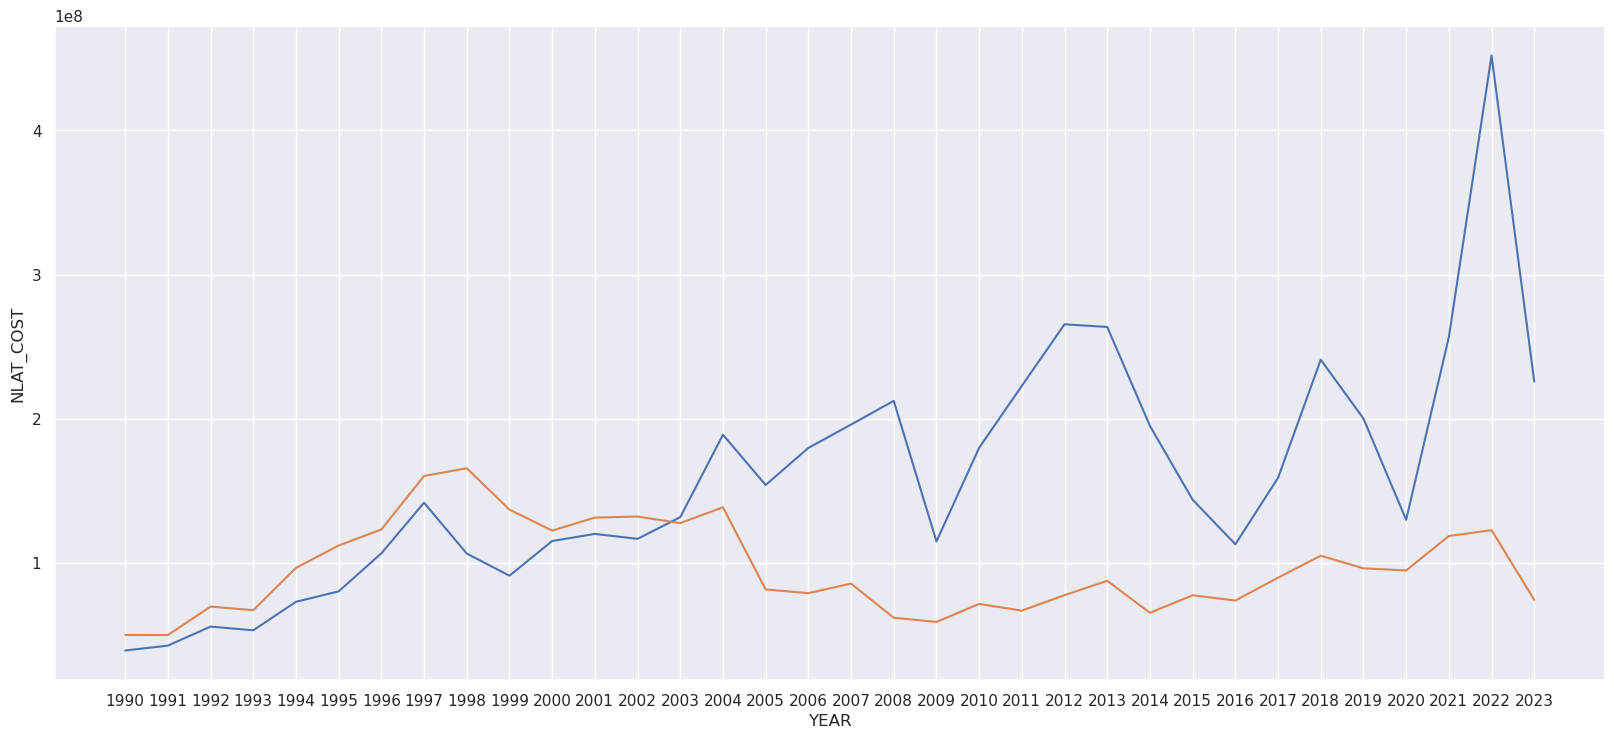

In [10]:
# Develop the first plot analyzing NLAT_COST over Year
sbn.set_theme(style = "darkgrid")
sbn.set(rc={'figure.figsize':(20,8.5)})
sbn.lineplot(x = "YEAR", y = "NLAT_COST",
             data = analysisNLAT)

# Develop the second plot analyzing NLAT_GALLONS over Year
sbn.set_theme(style = "whitegrid")
sbn.set(rc={'figure.figsize':(20,8.5)})
sbn.lineplot(x = "YEAR", y = "NLAT_GALLONS",
             data = analysisNLAT)

<AxesSubplot:xlabel='YEAR', ylabel='NLAT_GALLONS'>

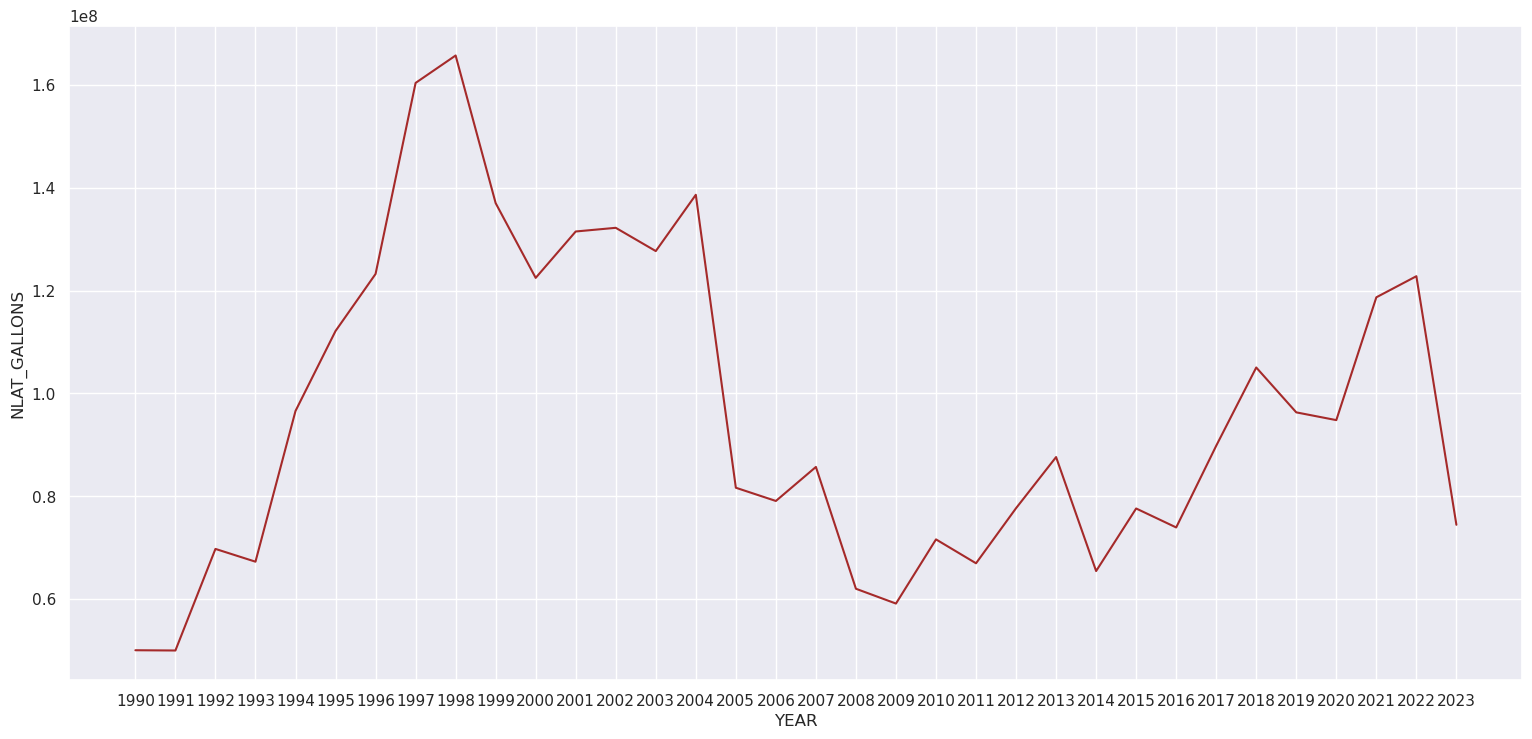

In [11]:
# 
sbn.set_theme(style = "whitegrid")
sbn.set(rc={'figure.figsize':(18.75,8.5)})
sbn.lineplot(x = "YEAR", y = "NLAT_GALLONS",
             color = "brown",
             data = analysisNLAT)

In [12]:
# Creating the data dataset
data = df[['SALA_GALLONS','SALA_COST','SDOM_GALLONS','SDOM_COST','SATL_GALLONS','SATL_COST','SPAC_GALLONS','SPAC_COST','SLAT_GALLONS','SLAT_COST','NALA_GALLONS','NALA_COST','NDOM_GALLONS','NDOM_COST','NATL_GALLONS','NATL_COST','NPAC_GALLONS','NPAC_COST','NLAT_GALLONS','NLAT_COST','MAC_GALLONS','MAC_COST']].astype('float64').fillna(df.mean())

In [13]:
# Checking if have any NaN value
data.isna().sum()

SALA_GALLONS    0
SALA_COST       0
SDOM_GALLONS    0
SDOM_COST       0
SATL_GALLONS    0
SATL_COST       0
SPAC_GALLONS    0
SPAC_COST       0
SLAT_GALLONS    0
SLAT_COST       0
NALA_GALLONS    0
NALA_COST       0
NDOM_GALLONS    0
NDOM_COST       0
NATL_GALLONS    0
NATL_COST       0
NPAC_GALLONS    0
NPAC_COST       0
NLAT_GALLONS    0
NLAT_COST       0
MAC_GALLONS     0
MAC_COST        0
dtype: int64

In [14]:
# Analyzing using describe
data.describe().astype('int64')

,SALA_GALLONS,SALA_COST,SDOM_GALLONS,SDOM_COST,SATL_GALLONS,SATL_COST,SPAC_GALLONS,SPAC_COST,SLAT_GALLONS,SLAT_COST,...,NDOM_GALLONS,NDOM_COST,NATL_GALLONS,NATL_COST,NPAC_GALLONS,NPAC_COST,NLAT_GALLONS,NLAT_COST,MAC_GALLONS,MAC_COST
count,22968,22968,22968,22968,22968,22968,22968,22968,22968,22968,...,22968,22968,22968,22968,22968,22968,22968,22968,22968,22968
mean,46815,75757,17070365,26576200,2965532,5022511,2539253,4068926,1619891,3003183,...,706170,958705,224858,429361,236592,504304,142602,246228,271202,552873
std,248011,425145,38075218,68139639,9992906,22036318,8802979,15920700,5910321,12966634,...,2985324,4074212,1032826,2271060,1608314,3878210,557168,1177171,994574,2225927
min,0,0,0,-2045399,0,-1948234,0,-474624,0,0,...,-5933,-536297,-51484,-823682,-47993,-108034,0,-17910,0,-2949686
25%,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50%,0,0,424775,831410,0,0,0,0,0,0,...,34365,51590,0,0,0,0,0,0,0,0
75%,0,0,9845717,17737002,0,0,0,0,202081,250121,...,327532,519995,0,41257,0,0,20702,86546,0,31488
max,3026785,8220539,211033424,700321288,98446879,375677046,61213875,216118970,57722736,188470729,...,42971000,109819000,16397786,39077964,42395302,128920329,11291409,32058109,29651217,41623256


In [15]:
# Analyzing the correlation
data.corr(method="pearson")

,SALA_GALLONS,SALA_COST,SDOM_GALLONS,SDOM_COST,SATL_GALLONS,SATL_COST,SPAC_GALLONS,SPAC_COST,SLAT_GALLONS,SLAT_COST,...,NDOM_GALLONS,NDOM_COST,NATL_GALLONS,NATL_COST,NPAC_GALLONS,NPAC_COST,NLAT_GALLONS,NLAT_COST,MAC_GALLONS,MAC_COST
SALA_GALLONS,1.000000,0.836868,0.015025,0.021664,-0.045770,-0.039917,-0.049022,-0.045947,-0.029944,-0.027262,...,-0.041666,-0.041341,-0.039765,-0.032750,-0.027375,-0.022767,-0.047435,-0.036144,-0.049832,-0.041332
SALA_COST,0.836868,1.000000,0.014185,0.051797,-0.048745,-0.039231,-0.049192,-0.044533,-0.029925,-0.021706,...,-0.039741,-0.038399,-0.038037,-0.032322,-0.025987,-0.022390,-0.044680,-0.035135,-0.046903,-0.040989
SDOM_GALLONS,0.015025,0.014185,1.000000,0.816156,0.779776,0.591158,0.592129,0.508487,0.713321,0.584260,...,-0.042606,-0.024542,-0.060413,-0.049112,-0.039247,-0.036091,-0.090392,-0.067583,-0.086270,-0.083809
SDOM_COST,0.021664,0.051797,0.816156,1.000000,0.743127,0.779071,0.504713,0.626249,0.693916,0.763315,...,-0.032816,0.006307,-0.046042,-0.034381,-0.032730,-0.028497,-0.075950,-0.055034,-0.079588,-0.074232
SATL_GALLONS,-0.045770,-0.048745,0.779776,0.743127,1.000000,0.894013,0.668284,0.713904,0.778568,0.725889,...,0.014328,0.044041,-0.030146,-0.022390,-0.024213,-0.020933,-0.054025,-0.038692,-0.052016,-0.051981
SATL_COST,-0.039917,-0.039231,0.591158,0.779071,0.894013,1.000000,0.573484,0.770968,0.678485,0.780528,...,0.011030,0.057845,-0.019310,-0.008161,-0.016642,-0.013025,-0.040446,-0.025866,-0.044688,-0.040238
SPAC_GALLONS,-0.049022,-0.049192,0.592129,0.504713,0.668284,0.573484,1.000000,0.846781,0.415076,0.383876,...,0.063439,0.077877,-0.032634,-0.022821,-0.017072,-0.018685,-0.056788,-0.041709,-0.017413,-0.035432
SPAC_COST,-0.045947,-0.044533,0.508487,0.626249,0.713904,0.770968,0.846781,1.000000,0.462086,0.522602,...,0.043876,0.091929,-0.021834,-0.007866,-0.014790,-0.012390,-0.049168,-0.033283,-0.029167,-0.031366
SLAT_GALLONS,-0.029944,-0.029925,0.713321,0.693916,0.778568,0.678485,0.415076,0.462086,1.000000,0.892433,...,0.001316,0.019886,-0.024248,-0.021137,-0.014770,-0.015330,-0.044752,-0.033117,-0.059368,-0.054481
SLAT_COST,-0.027262,-0.021706,0.584260,0.763315,0.725889,0.780528,0.383876,0.522602,0.892433,1.000000,...,-0.004020,0.028098,-0.020739,-0.013772,-0.012243,-0.011323,-0.038423,-0.024766,-0.051430,-0.046314


In [16]:
# Set the x, y value
x = data["SALA_GALLONS"]
y = data["SALA_COST"]

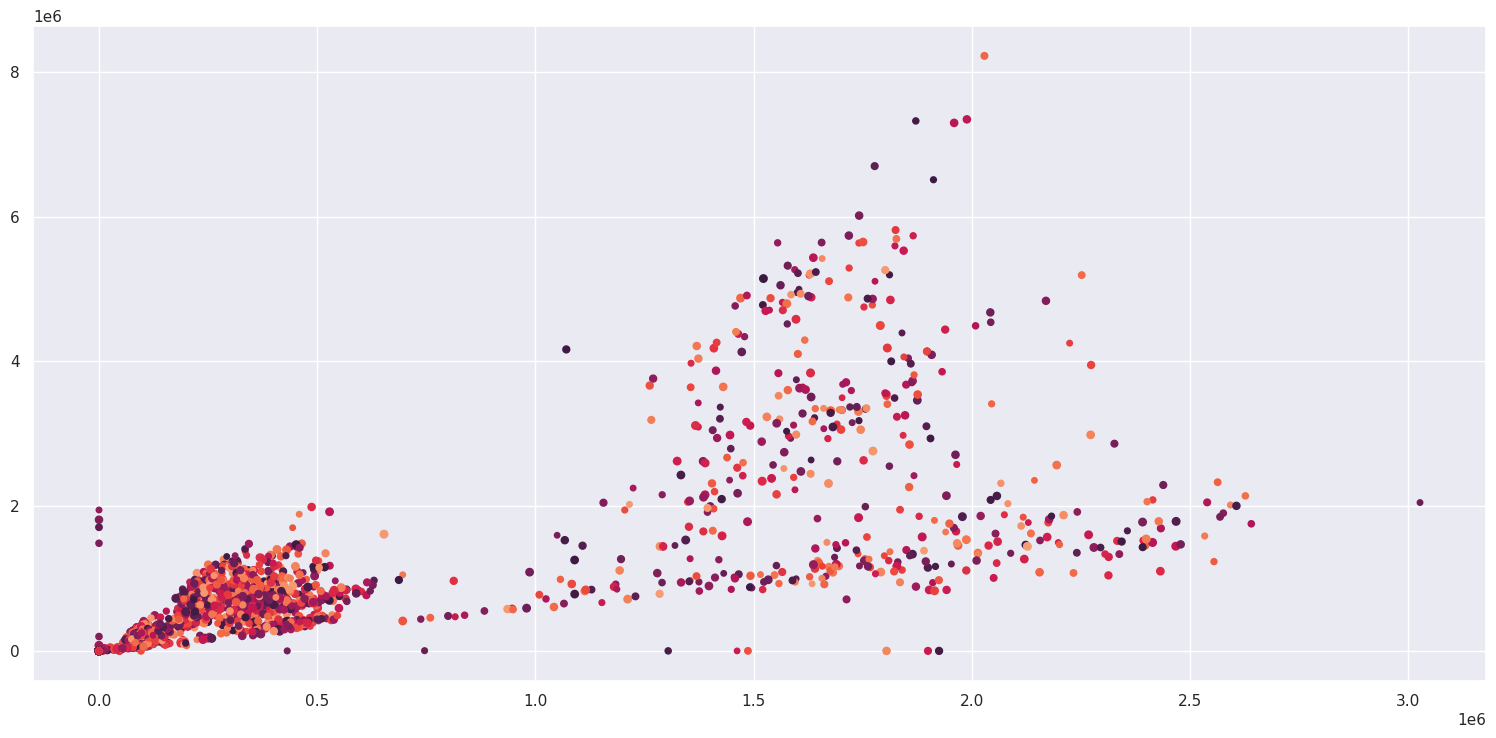

In [17]:
sizes = np.random.uniform(15, 30, len(x))
colors = np.random.uniform(15, 80, len(x))

# Building the plot to analysis more detailed
fig, ax = plt.subplots()
ax.scatter(x, y, s = sizes, c = colors, vmin = 0, vmax = 100)
plt.show()

<AxesSubplot:xlabel='SALA_GALLONS', ylabel='SALA_COST'>

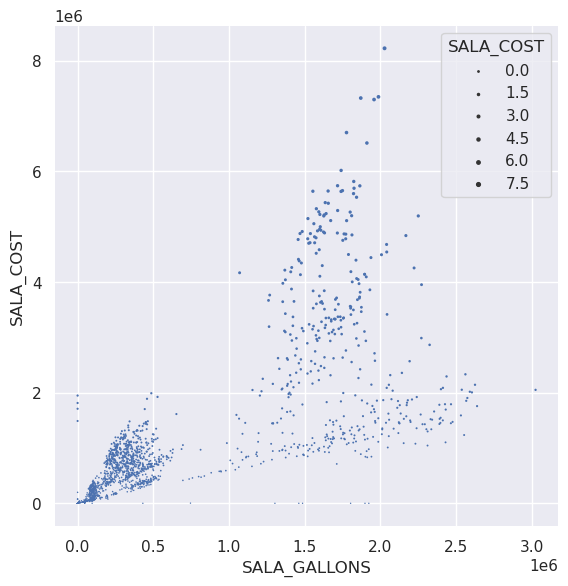

In [18]:
# Building the plot to analysis more detailed
f, ax = plt.subplots(figsize = (6.5,6.5))
sbn.despine(f, left = True, bottom = True)
sbn.scatterplot(x = "SALA_GALLONS", y = "SALA_COST",
               palette="ch:r=-.2,d=.3_r", size = "SALA_COST",
               sizes=(1, 8), linewidth=0,
               data = data, ax=ax)

In [19]:
target = df['CARRIER_NAME']
target = pd.DataFrame(target)